## Stock Forecasting
Time Series is a collection of data points collected at constant time intervals. It is time dependent. Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

In [1]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### Loading and Handling Time Series in Pandas

In [2]:
# load the data
apple = pd.read_csv("AAPL.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,1.151786,1.151786,1.133929,1.147321,0.993233,34823600
1,1996-01-03,1.142857,1.174107,1.138393,1.147321,0.993233,107458400
2,1996-01-04,1.156250,1.156250,1.120536,1.127232,0.975842,75045600
3,1996-01-05,1.129464,1.223214,1.120536,1.223214,1.058933,111482000
4,1996-01-08,1.232143,1.267857,1.214286,1.236607,1.070527,30335200


In [3]:
# identify the data types
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6193 non-null   object 
 1   Open       6193 non-null   float64
 2   High       6193 non-null   float64
 3   Low        6193 non-null   float64
 4   Close      6193 non-null   float64
 5   Adj Close  6193 non-null   float64
 6   Volume     6193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 338.8+ KB


In [4]:
# decribed data
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6193.000000,6193.000000,6193.000000,6193.000000,6193.000000,6.193000e+03
mean,56.237443,56.820016,55.671111,56.272008,52.994036,1.096375e+08
std,74.910837,75.740761,74.210479,75.039504,73.670390,9.725212e+07
min,0.459821,0.473214,0.455357,0.462054,0.399999,9.835000e+06
25%,1.633929,1.665179,1.600714,1.634286,1.414797,4.438730e+07
50%,18.492857,18.900000,18.090000,18.485714,16.003035,8.156190e+07
75%,94.040001,94.820000,93.040001,94.019997,84.512062,1.429260e+08
max,441.619995,457.649994,439.190002,455.609985,455.609985,1.855410e+09


In [5]:
# identifying the shape of the data
apple.shape

(6193, 7)

### Time Series Data Structure
3 types of structures are used with TS data: 
- DatetimeIndex (mostly used) 
- PeriodIndex 
- TimedeltaIndex 

Why do we need to convert the time into datetime while working with TS data? 
Time series data can come in with so many different formats. But not all of those formats are friendly to python’s pandas’ library. The most convenient format is the timestamp format for Pandas. But most of the time time-series data come in string formats. That is the reason why we need to change the date type from object to timestamp.
We will make it to the DatetimeIndex format and put it as the index column. Because when the ‘date’ column is the index column we will be able to resample it very easily.

In [6]:
# convert the data from object to datetime, to prevent future problems in plotting on a histogram
apple = pd.read_csv("AAPL.csv", parse_dates=['Date'], index_col="Date")
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-31,411.540009,425.660004,403.299988,425.040009,425.040009,93584200
2020-08-03,432.799988,446.549988,431.570007,435.750000,435.750000,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,438.660004,43267900
2020-08-05,437.510010,441.570007,435.589996,440.250000,440.250000,30498000
2020-08-06,441.619995,457.649994,439.190002,455.609985,455.609985,50490000


##### Why is resampling important?
Because we do not always need all the data in a huge dataset. For example, we may need only the data from June 2019. If your date format is in DatetimeIndex, it is very easy:

In [7]:
# selecting data for a specific year
apple['2019']

/Users/elonazharri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300
...,...,...,...,...,...,...
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.831299,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,288.442780,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,288.333313,36566500


In [8]:
# Or we can get the data for a single day
apple.loc['2019-12-30']

Open         2.894600e+02
High         2.926900e+02
Low          2.852200e+02
Close        2.915200e+02
Adj Close    2.900446e+02
Volume       3.602860e+07
Name: 2019-12-30 00:00:00, dtype: float64

In [9]:
# Check if there is any missing data
apple.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# dropping Close column, as we will use the Adjusted Close column for our model
apple = apple.drop('Close', axis=1)
apple = apple.rename(columns={"Adj Close": "Close"})
apple

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.993233,34823600
1996-01-03,1.142857,1.174107,1.138393,0.993233,107458400
1996-01-04,1.156250,1.156250,1.120536,0.975842,75045600
1996-01-05,1.129464,1.223214,1.120536,1.058933,111482000
1996-01-08,1.232143,1.267857,1.214286,1.070527,30335200
...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900


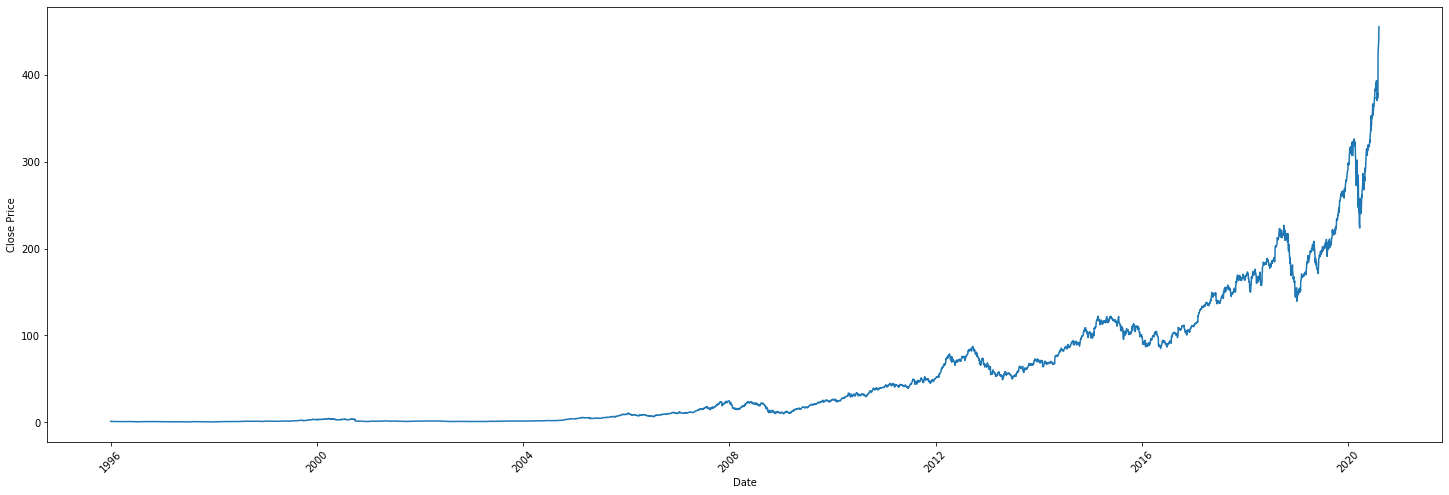

In [11]:
# visualize the data to gain some insight
plt.figure(figsize=(25,8))
plt.plot(apple.index,'Close', data=apple)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Call the .corr() method on the apple dataset 
apple.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999920,0.999916,0.998900,-0.359337
High,0.999920,1.000000,0.999868,0.999056,-0.357955
Low,0.999916,0.999868,1.000000,0.998961,-0.361110
Close,0.998900,0.999056,0.998961,1.000000,-0.360740
Volume,-0.359337,-0.357955,-0.361110,-0.360740,1.000000


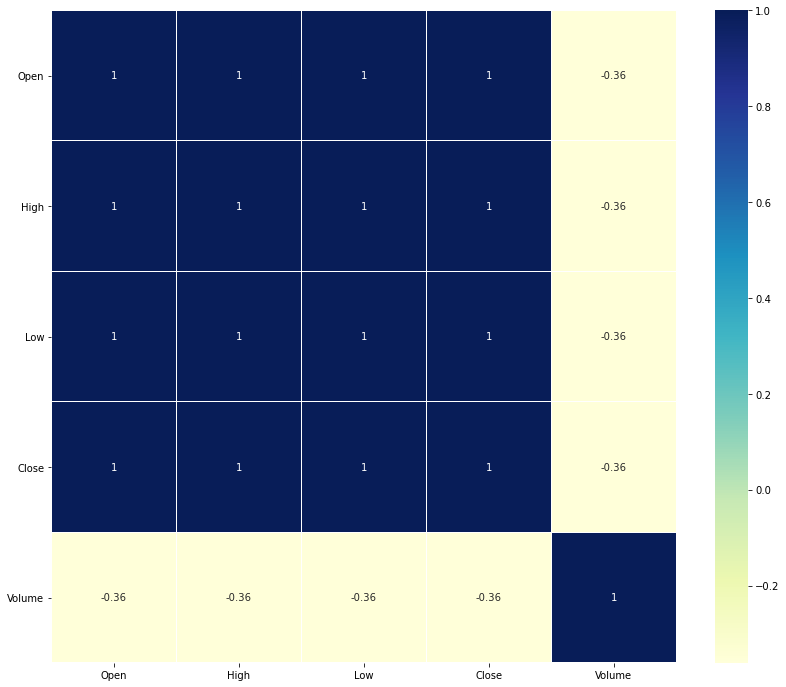

In [13]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(apple.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# EDA

### How to Check Stationarity of our TS data?
We can check stationarity using the following:
Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months.
Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

### Plotting Rolling Statistics

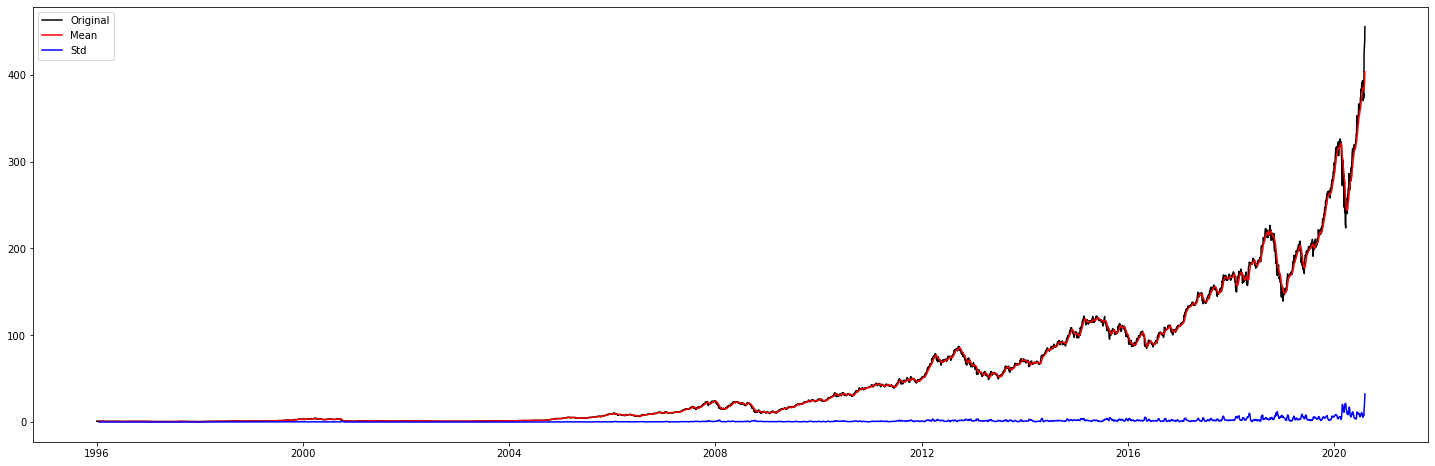

In [14]:
# plot mean and std
plt.figure(figsize=(25,8))
rolmean = apple['Close'].rolling(window=12).mean()
rolstd = apple['Close'].rolling(window=12).std()
orig = plt.plot(apple['Close'], color='black', label='Original')
mean = plt.plot(rolmean, color='red', label='Mean')
std = plt.plot(rolstd, color='blue', label='Std')
plt.legend(loc='best')
plt.title = ("Rolling mean and STD")
plt.show(block=False)

### Dickey-Fuller Test

Null hypothesis in ADF test is that Data is not stationary.
- if Test Statistic < Critical Values => Rejects the null hypothesis.
- if Test Statistic >Critical Values => failed to reject the null hypothesis.

In [15]:
# checking the stationarity of the data by using adfuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(apple['Close'])

Results of Dickey-Fuller Test:
Test Statistic                    5.150154
p-value                           1.000000
#Lags Used                       34.000000
Number of Observations Used    6158.000000
Critical Value (1%)              -3.431412
Critical Value (5%)              -2.862009
Critical Value (10%)             -2.567020
dtype: float64


From the results of Dickey-Fuller Test, the p-value is not less than 5%, so we can not reject the null hypothesis that the series is a random walk. As we know that a random walk is a non-stationary series, our next step is to make the series stationary.

### Estimating & Eliminating Trend
One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is an exponential growth and significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. We can first take the differences and than take a log transform to bring the data close to stationarity.

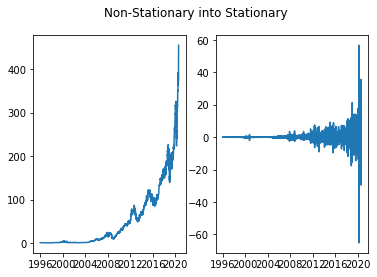

In [16]:
# Calculating and visualizing the difference
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Non-Stationary into Stationary')
# apple data as a non-stationary random walk
ax1.plot(apple['Close'])
# by computing the first differences, it becomes a stationary white noise process
ax2.plot(apple['Close'].diff().diff())
plt.show()

So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:
- Aggregation – taking average for a time period like monthly/weekly averages
- Smoothing – taking rolling averages
- Polynomial Fitting – fit a regression model

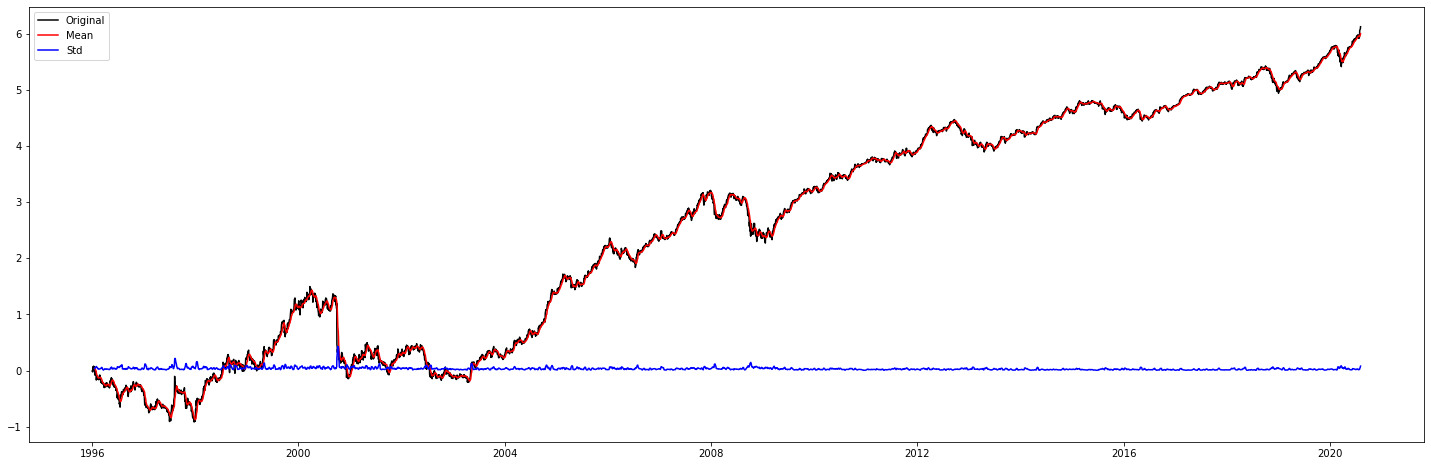

Results of Dicky-Fuller Test:
Test Statistic                    0.070866
p-value                           0.964015
#Lags Used                       22.000000
Number of Observations Used    6170.000000
Critical Value(1%                -3.431410
Critical Value(5%                -2.862009
Critical Value(10%               -2.567019
dtype: float64


In [17]:
# Taking the log
appleLogScale = np.log(apple['Close'])

# Smoothing the data
# Here we can take the average over the past 1 year, i.e. last 12 values.
moving_avg = appleLogScale.rolling(window = 12).mean()
movingSTD = appleLogScale.rolling(window=12).std()
plt.figure(figsize=(25,8))
orig = plt.plot(appleLogScale , color='black', label='Original')
mean = plt.plot(moving_avg, color='red', label='Mean')
std = plt.plot(movingSTD, color='blue', label='Std')
plt.legend(loc='best')
plt.title = ("Rolling mean and STD")
plt.show(block=False)


from statsmodels.tsa.stattools import adfuller
print("Results of Dicky-Fuller Test:")
dftest = adfuller(appleLogScale, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s' %key] = value
    
print(dfoutput)

By taking only the log of the series we simply eliminate the exponatial growth. Applying the difference and the log at the same time, the transformed series looks stationary.

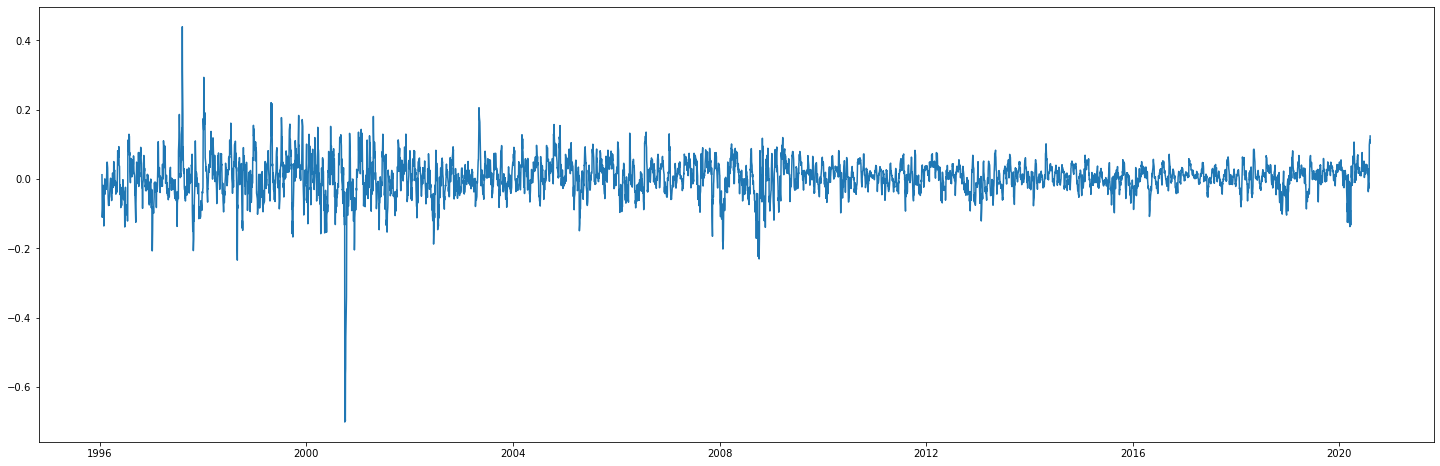

In [18]:
# taking the difference and plotting
appleLogScaleMinusMA = appleLogScale - moving_avg
appleLogScaleMinusMA.dropna(inplace=True)
plt.figure(figsize=(25,8))
plt.plot(appleLogScaleMinusMA)
plt.show()

In [19]:
# ADF test after taking the log anf difference 
test_stationarity(appleLogScaleMinusMA)

Results of Dickey-Fuller Test:
Test Statistic                -1.614457e+01
p-value                        4.637799e-29
#Lags Used                     1.700000e+01
Number of Observations Used    6.164000e+03
Critical Value (1%)           -3.431411e+00
Critical Value (5%)           -2.862009e+00
Critical Value (10%)          -2.567020e+00
dtype: float64


This looks like a much better series. However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

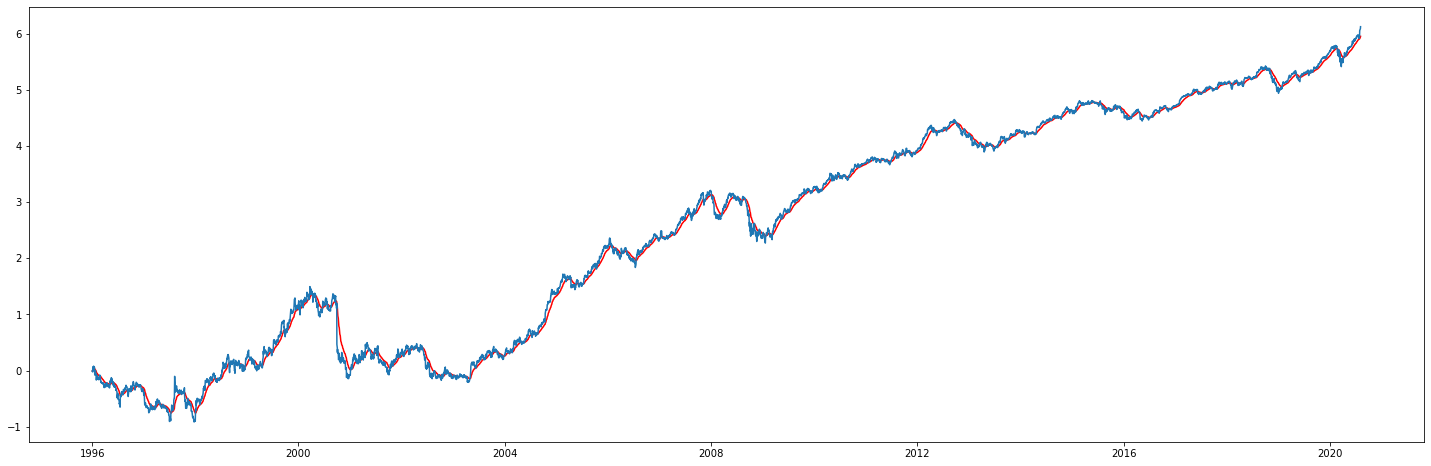

In [20]:
# calculating the weighted moving average
exponentialWeightedAVG = appleLogScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
appleLogScaleMinusMovingEWA = appleLogScale - exponentialWeightedAVG
plt.figure(figsize=(25,8))
plt.plot(exponentialWeightedAVG,  color='red')
plt.plot(appleLogScale)
plt.show()

In [21]:
# ADF test after calculating the weighted moving average
test_stationarity(appleLogScaleMinusMovingEWA)

Results of Dickey-Fuller Test:
Test Statistic                -9.936328e+00
p-value                        2.737526e-17
#Lags Used                     2.200000e+01
Number of Observations Used    6.170000e+03
Critical Value (1%)           -3.431410e+00
Critical Value (5%)           -2.862009e+00
Critical Value (10%)          -2.567019e+00
dtype: float64


After eliminating the trend, the next step was calculating the technical indicators and updating the dataset with the new features.

In [22]:
# updating the 'Close' column with the stationarized data
apple['Close']=appleLogScaleMinusMovingEWA

In [23]:
#appleLogScaleMinusMovingEWA.head()
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.000000,34823600
1996-01-03,1.142857,1.174107,1.138393,0.000000,107458400
1996-01-04,1.156250,1.156250,1.120536,-0.011433,75045600
1996-01-05,1.129464,1.223214,1.120536,0.051162,111482000
1996-01-08,1.232143,1.267857,1.214286,0.048168,30335200


# Feature Engineering
### MA - Moving Average Technical Indicator
The reason for calculating the moving average of a stock is to help smooth out the price data over a specified period of time by creating a constantly updated average price. A simple moving average (SMA) is a calculation that takes the arithmetic mean of a given set of prices over the specific number of days in the past; for example, over the previous 15, 30, 100, or 200 days. Exponential moving averages (EMA) is a weighted average that gives greater importance to the price of a stock in more recent days, making it an indicator that is more responsive to new information.

In [24]:
# MA Function
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

def MovingAverage(df, start_date = '1996-01-02', end_date = '2020-08-06', 
                               short_window = 20, long_window = 50, moving_avg = 'SMA'):
    '''
    The function takes the dataset, time-duration of analysis, 
    look-back periods and the moving-average type(SMA or EMA) as input 
    and returns the respective MA Crossover chart along with the buy/sell signals for the given period.
    '''
    # start_date - (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    # end_date - (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    # short_window - (int)lookback period for short-term moving average. Eg: 5, 10, 20 
    # long_window - (int)lookback period for long-term moving average. Eg: 50, 100, 200
    # moving_avg - (str)the type of moving average to use ('SMA' or 'EMA')
    # display_table - (bool)whether to display the date and price table at buy/sell positions(True/False)
    
    #df['Close'] = df.loc[start_date:end_date,'Close'] # assign new colun name
    df.dropna(axis = 0, inplace = True) # remove any null rows 
    
    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  
  
    if moving_avg == 'SMA':
        # Create a short simple moving average column
        df[short_window_col] = df['Close'].rolling(window = short_window, min_periods = 1).mean()

        # Create a long simple moving average column
        df[long_window_col] = df['Close'].rolling(window = long_window, min_periods = 1).mean()

    elif moving_avg == 'EMA':
        # Create short exponential moving average column
        df[short_window_col] = df['Close'].ewm(span = short_window, adjust = False).mean()

        # Create a long exponential moving average column
        df[long_window_col] = df['Close'].ewm(span = long_window, adjust = False).mean()
MovingAverage(apple)
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA
Date,,,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.000000,34823600,0.000000,0.000000
1996-01-03,1.142857,1.174107,1.138393,0.000000,107458400,0.000000,0.000000
1996-01-04,1.156250,1.156250,1.120536,-0.011433,75045600,-0.003811,-0.003811
1996-01-05,1.129464,1.223214,1.120536,0.051162,111482000,0.009932,0.009932
1996-01-08,1.232143,1.267857,1.214286,0.048168,30335200,0.017579,0.017579
...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,0.139794,93584200,0.074798,0.079375
2020-08-03,432.799988,446.549988,431.570007,0.155437,77037800,0.077831,0.080935
2020-08-04,436.529999,443.160004,433.549988,0.152995,43267900,0.081154,0.082413


### MACD - Moving Average Convergence Divergence
Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
The reason for calculating the MACD is to trigger technical signals when it crosses above (to buy) or below (to sell) its signal line. The speed of crossovers is also taken as a signal that a market is overbought or oversold.MACD helps to understand whether the bullish or bearish movement in the price is strengthening or weakening.

In [25]:
# MACD Function
def get_macd(df, slow=26, fast=12, smooth=9, start_date = '1996-01-02', end_date = '2020-08-06',):
    # isolate the closing price
    closingPrice = df.loc[start_date:end_date,'Close']
    
    exp1 = closingPrice.ewm(span = fast, adjust = False).mean()
    exp2 = closingPrice.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'MACD'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'MACD':'MACD_Signal'})
    hist = pd.DataFrame(macd['MACD'] - signal['MACD_Signal']).rename(columns = {0:'Hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df
get_macd(apple)

,MACD,MACD_Signal,Hist
Date,,,
1996-01-02,0.000000,0.000000,0.000000
1996-01-03,0.000000,0.000000,0.000000
1996-01-04,-0.000912,-0.000182,-0.000730
1996-01-05,0.003377,0.000529,0.002848
1996-01-08,0.006460,0.001716,0.004745
...,...,...,...
2020-07-31,-0.005215,-0.007642,0.002428
2020-08-03,0.002279,-0.005658,0.007937
2020-08-04,0.007929,-0.002941,0.010870


In [26]:
# drop histogram column, as we will not use it
apple= pd.concat([apple,get_macd(apple)], axis=1)
apple.drop(['Hist'], axis=1, inplace=True)

### RSI - Relative Strength Index Technical Indicator 
The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100. An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.
The average gain or loss used in the calculation is the average percentage gain or loss during a look-back period. The formula uses a positive value for the average loss.
The standard is to use 14 periods to calculate the initial RSI value.

In [27]:
# RSI Function
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

apple['RSI_14'] = get_rsi(apple['Close'], 14)
apple = apple.dropna()
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14
Date,,,,,,,,,,
1996-01-09,1.236607,1.236607,1.169643,-0.006067,62804000,0.013638,0.013638,0.004476,0.002268,44.924155
1996-01-10,1.160714,1.241071,1.151786,0.032183,91358400,0.016287,0.016287,0.005921,0.002998,58.986142
1996-01-11,1.165179,1.250000,1.156250,0.045678,189184800,0.019961,0.019961,0.008063,0.004011,62.613131
1996-01-12,1.241071,1.241071,1.187500,0.011206,100464000,0.018988,0.018988,0.006899,0.004589,50.361696
1996-01-15,1.205357,1.232143,1.191964,0.016185,90770400,0.018708,0.018708,0.006305,0.004932,51.827974
...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,0.139794,93584200,0.074798,0.079375,-0.005215,-0.007642,63.513921
2020-08-03,432.799988,446.549988,431.570007,0.155437,77037800,0.077831,0.080935,0.002279,-0.005658,65.648580
2020-08-04,436.529999,443.160004,433.549988,0.152995,43267900,0.081154,0.082413,0.007929,-0.002941,65.009243


### Bollinger Band
Is used to generate oversold or overbought signals.
There are three lines that compose Bollinger Bands: A simple moving average (middle band) and an upper and lower band. The upper and lower bands are typically 2 standard deviations +/- from a 20-day simple moving average, but can be modified.

In [28]:
# BB Function
def BollingerBand(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb
apple['Upper_BB'], apple['Lower_BB'] = BollingerBand(apple['Close'], apple['20_SMA'], 20)
apple.dropna(inplace=True)
apple

,Open,High,Low,Close,Volume,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB
Date,,,,,,,,,,,,
1996-02-05,1.060268,1.062500,1.035714,-0.051980,79682400,-0.041878,-0.029986,-0.022839,-0.021595,48.650292,0.068791,-0.152546
1996-02-06,1.044643,1.071429,1.044643,-0.036407,56554400,-0.043395,-0.030233,-0.018700,-0.021016,50.968288,0.066032,-0.152821
1996-02-07,1.062500,1.062500,0.991071,-0.077967,90081600,-0.048902,-0.032001,-0.018559,-0.020524,45.115265,0.055479,-0.153284
1996-02-08,0.982143,1.004464,0.982143,-0.084936,65791600,-0.055433,-0.033892,-0.018793,-0.020178,44.198809,0.039993,-0.150858
1996-02-09,0.995536,1.017857,0.986607,-0.083254,51422000,-0.060156,-0.035594,-0.018628,-0.019868,44.491806,0.030620,-0.150931
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,0.139794,93584200,0.074798,0.079375,-0.005215,-0.007642,63.513921,0.139645,0.009951
2020-08-03,432.799988,446.549988,431.570007,0.155437,77037800,0.077831,0.080935,0.002279,-0.005658,65.648580,0.151664,0.003998
2020-08-04,436.529999,443.160004,433.549988,0.152995,43267900,0.081154,0.082413,0.007929,-0.002941,65.009243,0.162261,0.000047


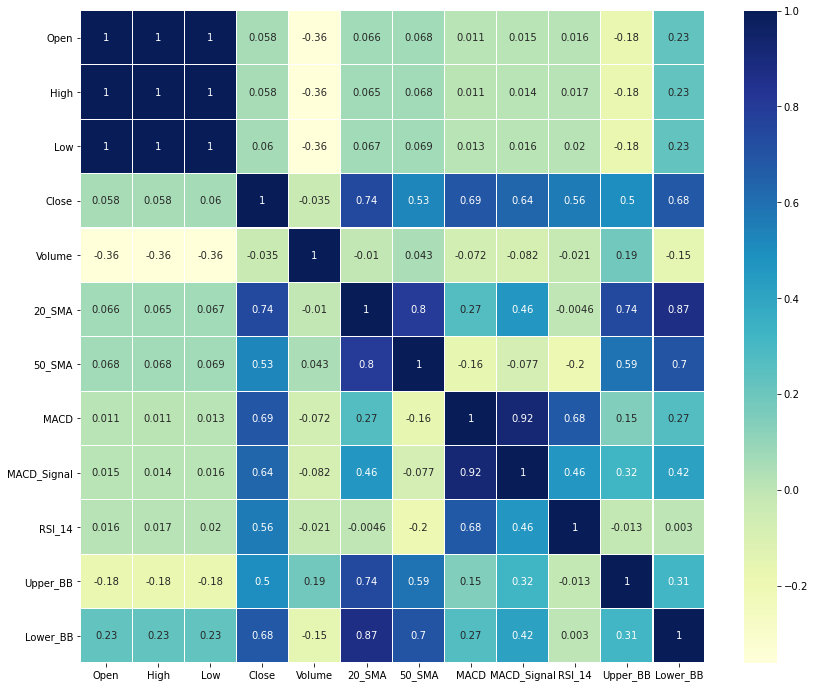

In [29]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(apple.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [30]:
# drop ‘Open’, ‘Low’, ‘High’, and ‘Volume’ columns 
apple.drop(['Open', 'High','Low','Volume'], axis=1, inplace=True)

In [31]:
# finalized dataset
apple.head()

,Close,20_SMA,50_SMA,MACD,MACD_Signal,RSI_14,Upper_BB,Lower_BB
Date,,,,,,,,
1996-02-05,-0.051980,-0.041878,-0.029986,-0.022839,-0.021595,48.650292,0.068791,-0.152546
1996-02-06,-0.036407,-0.043395,-0.030233,-0.018700,-0.021016,50.968288,0.066032,-0.152821
1996-02-07,-0.077967,-0.048902,-0.032001,-0.018559,-0.020524,45.115265,0.055479,-0.153284
1996-02-08,-0.084936,-0.055433,-0.033892,-0.018793,-0.020178,44.198809,0.039993,-0.150858
1996-02-09,-0.083254,-0.060156,-0.035594,-0.018628,-0.019868,44.491806,0.030620,-0.150931


# Scaling and Splitting Data

In [32]:
from sklearn.model_selection import TimeSeriesSplit
X = apple.loc[:,apple.columns !=  'Close']
y = apple['Close']
cv = TimeSeriesSplit(n_splits=3)

for train_index, test_index in cv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   0    1    2 ... 1540 1541 1542] TEST: [1543 1544 1545 ... 3082 3083 3084]
TRAIN: [   0    1    2 ... 3082 3083 3084] TEST: [3085 3086 3087 ... 4624 4625 4626]
TRAIN: [   0    1    2 ... 4624 4625 4626] TEST: [4627 4628 4629 ... 6166 6167 6168]


In [33]:
# we now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4627, 7) (4627,)
(1542, 7) (1542,)


# Build Models
### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# creating the Regressor
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [35]:
# make predictions and evaluate the results
predict_y = regressor.predict(X_test)
print('Prediction Score : ' , regressor.score(X_test,y_test))
print('Mean Squared Error : ',mean_squared_error(y_test,predict_y))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predict_y)))

Prediction Score :  0.9342512121777825
Mean Squared Error :  0.0001596220806460803
Root Mean Squared Error: 0.012634163234899267


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.01 degrees.
Mean Squared Error: 0.00013290263212934524
Root Mean Squared Error: 0.011528340389203697


### Support Vector Machine

In [37]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
score = regressor.score(X_train,y_train)
print("R-squared:", score)
print("MSE:", mean_squared_error(y_test,y_pred))
print("Root-mean-squared-error:",np.sqrt(mean_squared_error(y_test,y_pred)))

R-squared: 0.5165197437684835
MSE: 0.0023107109824894727
Root-mean-squared-error: 0.04806985523682667


### Gradient Boosted Trees

In [38]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
pred=reg.predict(X_test)
score = reg.score(X_train,y_train)
mse = mean_squared_error(y_test, pred)
print("R-squared:", score)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Root-mean-squared-error:",np.sqrt(mse))

R-squared: 0.991234160803931
The mean squared error (MSE) on test set: 0.0002
Root-mean-squared-error: 0.012450025272926695


In [39]:
# generate a new dataframe with all the prediction results
apple_2=X_test.merge(y_test, left_index=True, right_index=True)
apple_2['Predition_LR'] = predict_y
apple_2['Predition_RF'] = predictions
apple_2['Predition_SVM'] = y_pred
apple_2['Predition_GBT'] = pred
apple_2.iloc[:,7:]

,Close,Predition_LR,Predition_RF,Predition_SVM,Predition_GBT
Date,,,,,
2014-06-24,0.017336,-0.006292,0.006921,-0.099029,0.002504
2014-06-25,0.017199,-0.009176,0.000961,-0.099853,0.000180
2014-06-26,0.021858,-0.002847,0.005557,-0.075843,-0.001392
2014-06-27,0.031779,0.014242,0.019791,-0.036009,0.016814
2014-06-30,0.039694,0.029900,0.038399,-0.011247,0.032979
...,...,...,...,...,...
2020-07-31,0.139794,0.111061,0.139997,0.102305,0.134012
2020-08-03,0.155437,0.145234,0.152225,0.120807,0.145843
2020-08-04,0.152995,0.162089,0.169119,0.115689,0.160861


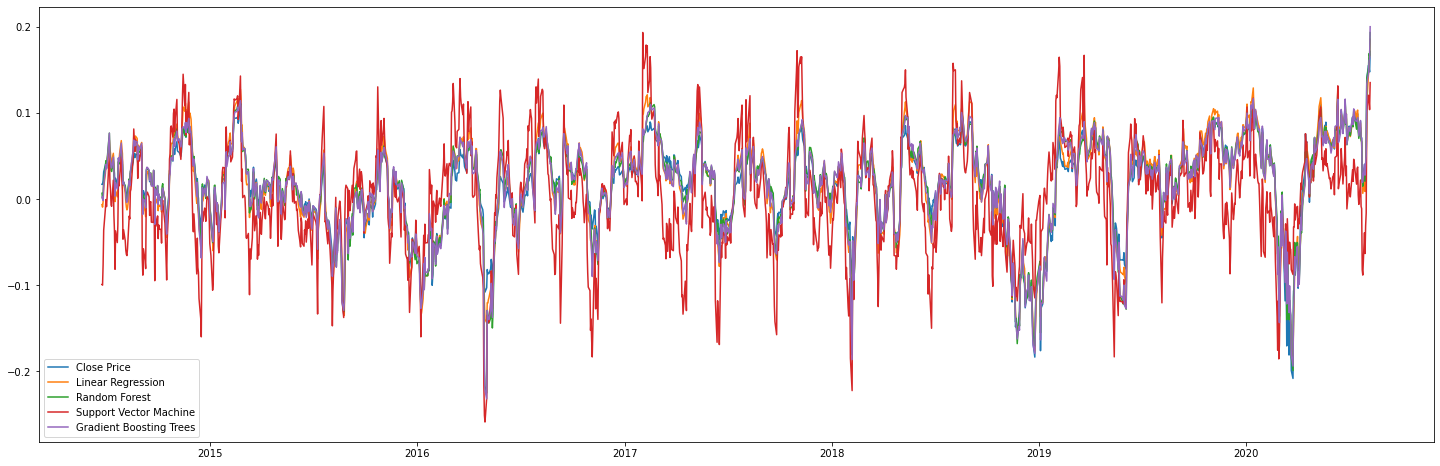

In [40]:
#Plot the predicted and the expected values as scatterplot
plt.figure(figsize=(25,8))
plt.plot(apple_2.index,apple_2['Close'],label='Close Price')
plt.plot(apple_2.index,apple_2['Predition_LR'],label='Linear Regression')
plt.plot(apple_2.index,apple_2['Predition_RF'], label='Random Forest')
plt.plot(apple_2.index,apple_2['Predition_SVM'], label='Support Vector Machine')
plt.plot(apple_2.index,apple_2['Predition_GBT'], label='Gradient Boosting Trees')
plt.legend()
plt.show()

### Model Selection
After comparing all the models, I chose to select the Random Forest model as the best fit for this dataset, based on the mean squared error, which was lower compared to others.


In [42]:
# print Random Forest parameters in use
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Looks like we have many parameters, which will make it more difficult to optimize the model.
Therefore a good approach is to use Randomized Search Cross Validation, which will provide us the benefit of a random search instead of trying every combination, but selecting at random to sample a wide range of values.

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [48]:
# We can view the best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

To determine if random search yielded a better model, we compare the base model with the best random search model.

In [47]:
# Evaluate the model with the best parameters generated from the Randomized Search Cross Validation
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mse = mean_squared_error(y_test, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('MSE = {:0.2f}%.'.format(mse))
    
    return mse

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_mse = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_mse = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (base_mse - random_mse) / base_mse))

Model Performance
Average Error: 0.0077 degrees.
MSE = 0.00%.
Model Performance
Average Error: 0.0073 degrees.
MSE = 0.00%.
Improvement of 1.64%.


The Random Search has improvement our model by 1.64%.

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. 

In [50]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [1400,1600, 1800, 2000],
 'min_samples_split':[2] ,
 'min_samples_leaf': [2],
 'max_features': ['auto'],
 'max_depth': [80],
 'bootstrap': [True]}

# Create a based model
rf = RandomForestRegressor(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [51]:
# Evaluate the model with the best parameters generated from the Grid Search Cross Validation
best_grid = grid_search.best_estimator_
grid_mse = evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (base_mse - grid_mse) / base_mse))

Model Performance
Average Error: 0.0072 degrees.
MSE = 0.00%.
Improvement of 4.44%.


We received a great improvement of 4.44% 